# Exploring parameterized stimuli

The geometric {py:mod}`components <stimupy.components>` are the basic building blocks
which can be composed into all kinds of stimuli.

In [1]:
import matplotlib.pyplot as plt
from stimupy.utils import plot_stim

Included in `stimupy` is a large set of functions
to generate known {py:mod}`stimuli <stimupy.stimuli>` (see [](./organization))
These are generally subdivided into submodules
bearing their usual name.
```{margin}
The submodule names are pluralized,
so a {py:func}`bullseye <stimupy.stimuli.bullseye.bullseye>` stimulus function
can be found in {py:func}`stimupy.stimuli.bullseyes.bullseye`
```
All of these can be accessed by `import stimupy.stimuli.<submodule>`
or `from stimupy.stimuli import <submodule>`


## Thin wrapper around component - Simultaneous Brightness Contrast (SBC)
Firstly, a geometrically simple stimulus:
a classic Simultaneous Brightness Contrast (SBC) display:

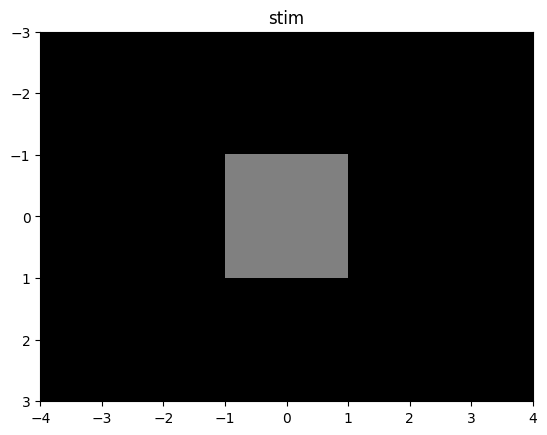

In [2]:
from stimupy.stimuli import sbcs

stim = sbcs.basic(visual_size=(6,8), ppd=10,
                  target_size=(2,2))

plot_stim(stim)
plt.show()

As you can see, this is not (much) more than:

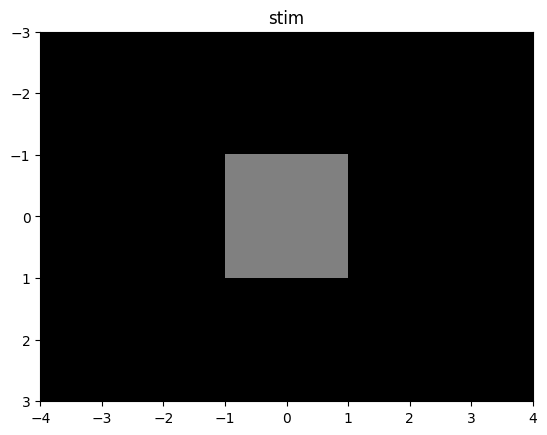

In [3]:
from stimupy.components import shapes

component = shapes.rectangle(visual_size=(6,8), ppd=10,
                             rectangle_size=(2,2),
                             intensity_background=0.0, intensity_rectangle=0.5)

plot_stim(component)
plt.show()

{py:mod}`stimuli <stimupy.stimuli>`, like {py:mod}`components <stimupy.components>`,
also have 3 overall categories of parameters:
- image size & resolution
- stimulus geometry
- stimulus photometry (intensities)

However, some of the stimulus parameters
have different names in {py:mod}`stimuli <stimupy.stimuli>`.
In particular, many {py:mod}`stimuli <stimupy.stimuli>`
have the concept of a `target` region(s):
image regions that are of some particular scientific interest in this stimulus.
For an SBC stimulus, this would be the rectangle.
Thus, the {py:func}`sbcs.basic <stimupy.stimuli.sbcs.basic>` function takes a
- `target_size`, compared to `rectangle_size`
- `intensity_target`, rather than an `intensity_rectangle`
  (with a default intermediate value of `0.5`)
- In addition, the output stimulus contains a `target_mask`, which masks the pixels of the target region.

For this specific stimulus,
the {py:func}`sbcs.basic <stimupy.stimuli.sbcs.basic>` provides little use over
the base component.
But, realistically, we would not show just this one part of a SBC display, but rather
show both sides of the SBC displays as implemented in {py:func}`two_sided <stimupy.stimuli.sbcs.basic_two_sided>`:

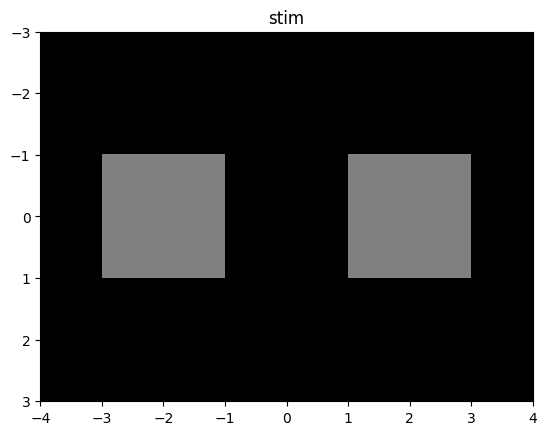

In [4]:
two_sided_stim = sbcs.basic_two_sided(visual_size=(6,8), ppd=10,
                                target_size=(2,2))

plot_stim(two_sided_stim)
plt.show()

Now we have a true SBC display:
two separate image regions, with different background intensities,
and physically identical patches embedded in these regions.

Both patches are part of the same `target_mask`,
although with different integer-indices:

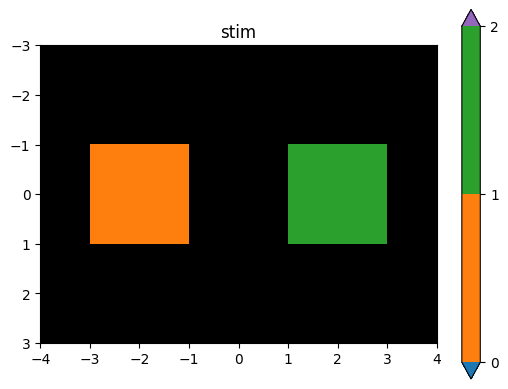

In [5]:
plot_stim(two_sided_stim, mask='target_mask')
plt.show()

and they are controlled by the same `target_size` argument:

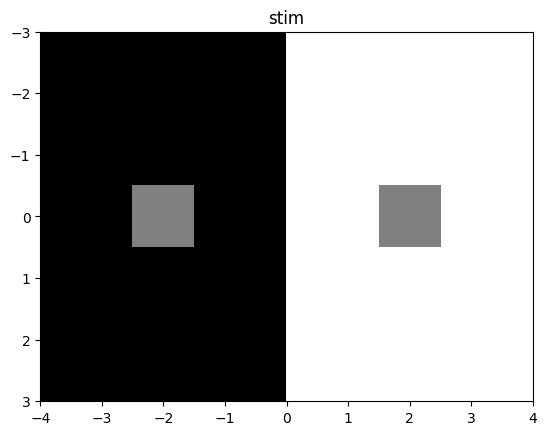

In [6]:
two_sided_stim = sbcs.basic_two_sided(visual_size=(6,8), ppd=10,
                                target_size=(1,1),
                                intensity_background=(0.0,1.0))

plot_stim(two_sided_stim)
plt.show()

The `intensity_background` can also be varied at creation:

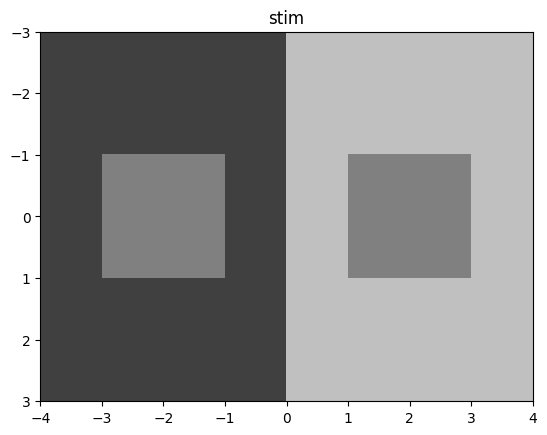

In [7]:
two_sided_stim = sbcs.basic_two_sided(visual_size=(6,8), ppd=10,
                                target_size=(2,2),
                                intensity_background=(.25,.75))

plot_stim(two_sided_stim)
plt.show()

This {py:mod}`stimulus <stimupy.stimuli>`-function provides
a significant useful shorthand
over manually composing such a display from {py:mod}`components <stimupy.components>`,
by keeping some parameters consistent between the parts.
For this specific function, the two `target` regions
will have the same size and central positioning.

## Parameterized composition - Bullseye
In the [previous tutorial](composition)
we constructed a bullseye stimulus:
a central (target) disc, surrounded by one or more rings.

This, too, is a stimulus included in {py:mod}`stimupy.stimuli`:

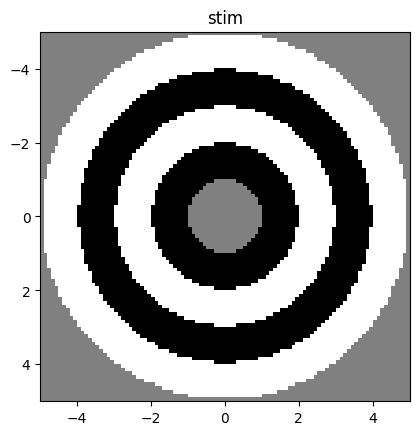

In [8]:
from stimupy import bullseyes

stim_bull = bullseyes.circular(
   visual_size=(10,10),
   ppd=10,
   n_rings=5,
   ring_width=1,
)

plot_stim(stim_bull)
plt.show()

This function provides some higher-level parameterization(s)
than our manual composition;
we simply specify the number of surrounding rings we want,
and the width for each of these.
There is also a two-sided display of this stimulus:

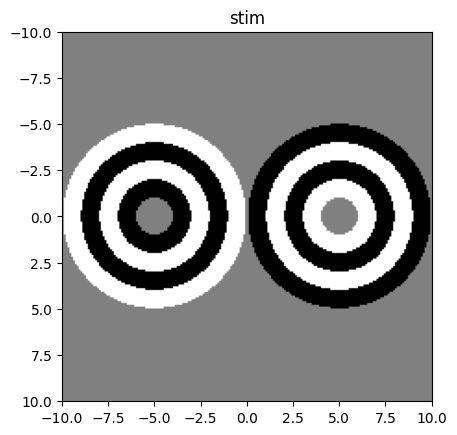

In [9]:
stim_2bull = bullseyes.circular_two_sided(
   visual_size=(20,20),
   ppd=10,
   n_rings=5,
   ring_width=1,
  intensity_rings=((0, 1), (1, 0))
)

plot_stim(stim_2bull)
plt.show()

## Multiple paramaterizations - Todorovic illusion

So far, we've highlighted some stimuli for which it is quite clear
how one would compose them.
Generally, though, there can be multiple ways to compose a stimulus
and this can have implications for how one would parameterize
the composed stimulus.

A good example of this is the Todorovic Illusion, which one can interpret as
having a [rectangular target](todorovics.rectangle) that is partially occluded by some "covers"
OR as having a [cross-shaped target](todorovics.cross) with adjoining squares.
For a single stimulus parameterization,
these two conceptions may produce perfectly identical images ([see fig, top](fig_todorovics2)).
However, when changing parameters,
you would expect different *behavior* from the stimulus function
dependent on your conception/interpretation of the stimulus ([see fig, bottom](fig_todorovics2)).

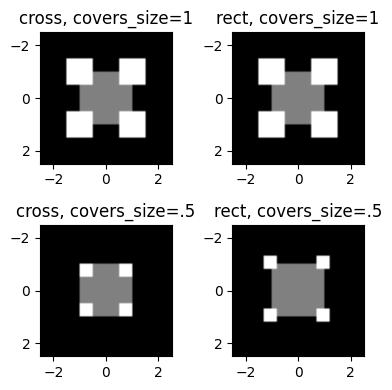

In [10]:
from stimupy.stimuli import todorovics
from stimupy.utils import plot_stimuli

resolution = {"visual_size": 5, "ppd": 10}

stims = {
    "cross, covers_size=1" : todorovics.cross(**resolution,     cross_size=2,  cross_thickness=1, covers_size=1),
    "rect, covers_size=1"  : todorovics.rectangle(**resolution, target_size=2, covers_offset=1,   covers_size=1),
    "cross, covers_size=.5": todorovics.cross(**resolution,     cross_size=2,  cross_thickness=1, covers_size=0.5),
    "rect, covers_size=.5" : todorovics.rectangle(**resolution, target_size=2, covers_offset=1,   covers_size=0.5),
}

plot_stimuli(stims)